# Data Structure

# 1D

list

In [1]:
studentA = [89.9, 90.3, 85.1, 87.5]
studentB = [80.1, 84.0, 85.9, 85]

# 2D

pandas dataframe

In [2]:
import pandas as pd
df = pd.DataFrame([
              [89.9, 90.3, 85.1, 87.5],
              [80.1, 84.0, 85.9, 85]
], index = ['studentA', 'studentB'], columns = ['mid1', 'mid2', 'mid3', 'final'])
df

,mid1,mid2,mid3,final
studentA,89.9,90.3,85.1,87.5
studentB,80.1,84.0,85.9,85.0


# Matrix Calculation

# Determinant

행렬 계산하는 법과 Det 구하는 법은 아니 패스

# Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame([
    [1,3,5,7,9],
    [2,8,14,20,26]],
    index = ['mid','final']
).T

df['ones'] = np.ones(5)

df

,mid,final,ones
0,1,2,1.0
1,3,8,1.0
2,5,14,1.0
3,7,20,1.0
4,9,26,1.0


In [4]:
X = df[['ones', 'mid']].values
Y = df['final'].values.reshape(-1, 1) # Transpose

# 위의 공식 계산
beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))

beta

array([[-1.],
       [ 3.]])

In [5]:
Y

array([[ 2],
       [ 8],
       [14],
       [20],
       [26]])

In [6]:
X

array([[1., 1.],
       [1., 3.],
       [1., 5.],
       [1., 7.],
       [1., 9.]])

이를 통해서, 
Y = X * beta (+ error) 라는 결과에 대입해보면

2 = (1 * -1) + (3 * 1)
8 = (1 * -1) + (3 * 3)
...

# Visualize Linear Regression

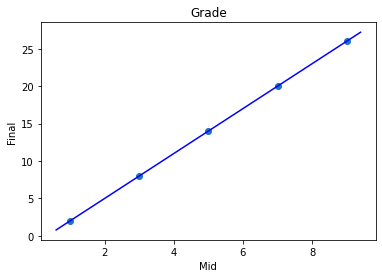

In [7]:
# Beta 를 변수로 저장
beta_0 = beta[0, 0]
beta_1 = beta[1, 0]

# 선으로 그림
plt.scatter(df['mid'], df['final'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '-', color='b')
plt.title('Grade')
plt.xlabel('Mid')
plt.ylabel('Final')
plt.show()

## Linear regression with Scipy 

In [8]:
from scipy import stats
stats.linregress([1, 3, 5, 7, 9], [2, 8, 14, 20, 26])

LinregressResult(slope=3.0, intercept=-1.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0, intercept_stderr=0.0)

# Dimensionality Reduction : PCA, SVD 

# 딥러닝 : CNN (Section 4 에서 배움)

"Convolving" 은 필터, 커널을 (작은 매트릭스) 통해 이미지를 축소화 하여 그 결과물을 분석에 사용 하는 방법이다. 필터를 통해서 수정된 이미지는 특수한 부분이 "강조"되어 이미지 분석에 사용 될 수 있다. 이는 완전히 선형대수를 기반으로한 단계이다.

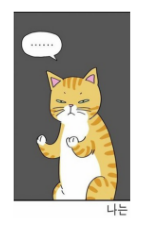

In [27]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
from skimage.exposure import rescale_intensity
from skimage import color

img = imageio.imread('https://i.imgur.com/nItPxZp.png')[:,:,:3]
plt.axis('off')
plt.imshow(img);

# colab에 library 설치하기

In [10]:
!pip3 install imageio
!pip3 install skimage
!pip3 install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
pip install --upgrade --force-reinstall -U git+https://github.com/ocampor/image-quality@master 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ocampor/image-quality (to revision master) to /tmp/pip-req-build-fpt4z43n
  Running command git clone --filter=blob:none --quiet https://github.com/ocampor/image-quality /tmp/pip-req-build-fpt4z43n
  Resolved https://github.com/ocampor/image-quality to commit faf6a94382acd9a1469d2244497df0d879b3a714
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.7 MB/s eta 0:00:00
     ━━

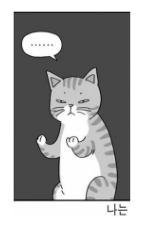

In [28]:
# 이미지를 흑백으로 치환, ( M*N*4 에서 M*N*1로 축소)
grayscale = color.rgb2gray(img)
plt.axis('off')
plt.imshow(grayscale, cmap=plt.cm.gray);

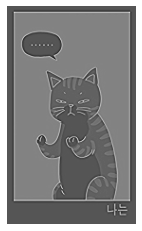

In [29]:
# 라플라시안 필터
laplacian = np.array([[0,0,1,0,0],
              [0,0,2,0,0],
              [1,2,-16,2,1],
              [0,0,2,0,0],
              [0,0,1,0,0]])

laplacian_image = nd.convolve(grayscale, laplacian)
plt.axis('off')
plt.imshow(laplacian_image, cmap=plt.cm.gray);

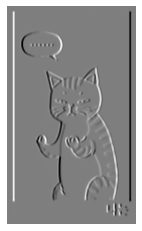

In [30]:
# sobel filter (y axis)
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobel_x_image = nd.convolve(grayscale, sobel_x)
plt.axis('off')
plt.imshow(sobel_x_image, cmap=plt.cm.gray);

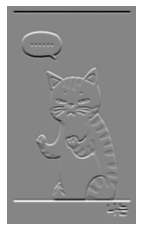

In [31]:
# sobel filter (y axis)
sobel_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_y_image = nd.convolve(grayscale, sobel_y)
plt.axis('off')
plt.imshow(sobel_y_image, cmap=plt.cm.gray);

# 스칼라

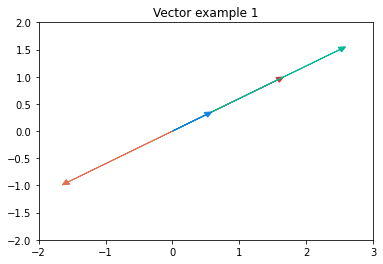

In [32]:
import math
import matplotlib.pyplot as plt
import numpy as np

# 시작 벡터 (0,0) 기준
blue = [.5, .3] 

# 스칼라를 곱함
green = np.multiply(5, blue)
red = np.multiply(math.pi, blue)
orange = np.multiply(-3.12, blue)

# 스케일이 바뀐 벡터를 그림
plt.arrow(0, 0, red[0], red[1], head_width = .1, head_length = .1, color = '#d63031')
plt.arrow(0, 0, green[0], green[1], head_width = .1, head_length = .1, color = '#00b894')
plt.arrow(0, 0, blue[0], blue[1], head_width = .1, head_length = .1, color = '#0984e3')
plt.arrow(0, 0, orange[0], orange[1], head_width = .1, head_length = .1, color = '#e17055')
plt.xlim(-2, 3)          
plt.ylim(-2, 2)
plt.title("Vector example 1")
plt.show()

# 벡터

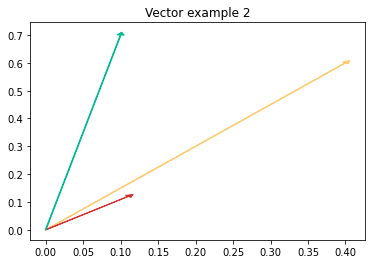

In [33]:
# 벡터 예시
yellow = [.4, .6]
red = [.11, .12]
blue = [.1, .7]

plt.arrow(0, 0, .4, .6, head_width = .01, head_length = .01, color = '#fdcb6e')
plt.arrow(0, 0, .11, .12, head_width = .01, head_length = .01, color = '#d63031')
plt.arrow(0, 0, .1, .7,  head_width = .01, head_length = .01, color = '#00b894')
plt.title('Vector example 2')
plt.show()

# 3D 벡터

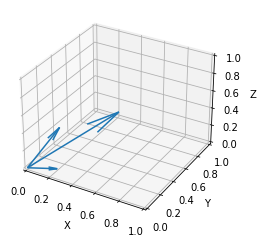

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3번째 요소 추가 
yellow = [.4, .6, .5]
red = [.11, .12, .3]
blue = [.1, .7, .4]

vectors = np.array([[0, 0, 0, .5, .5, .5], 
                    [0, 0, 0, .2, .1, .0],
                    [0, 0, 0, .1, .3, .3]])

X, Y, Z, U, V, W = zip(*vectors) # 몰라도 됩니다. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

벡터의 성질과 내, 외적 등 내용은 알고있으므로 생략

# Transpose

In [35]:
df

,mid,final,ones
0,1,2,1.0
1,3,8,1.0
2,5,14,1.0
3,7,20,1.0
4,9,26,1.0


In [36]:
df.T

,0,1,2,3,4
mid,1.0,3.0,5.0,7.0,9.0
final,2.0,8.0,14.0,20.0,26.0
ones,1.0,1.0,1.0,1.0,1.0


# Numpy 선형대수

In [41]:
# 리스트를 더하기

a = [1, 2, 3]
b = [4, 5, 6]

a + b

[1, 2, 3, 4, 5, 6]

In [42]:
# 2개의 numpy array를 더하기

import numpy as np

a_np = np.array(a)
b_np = np.array(b)

a_np + b_np

array([5, 7, 9])

## 리스트와 Array의 차이

In [43]:
a_np * b_np

array([ 4, 10, 18])

In [44]:
a_np - b_np

array([-3, -3, -3])

In [45]:
a_np / b_np

array([0.25, 0.4 , 0.5 ])

In [46]:
(a_np * b_np).sum() # a 와 b 벡터의 내적 계산

32

In [47]:
np.dot(a_np, b_np)

32

## 1D vs 2D NumPy Arrays

In [48]:
a_np

array([1, 2, 3])

In [49]:
a_np.shape

(3,)

In [50]:
a_np.T.shape # Transpose 이후에도 구분 되지 않음

(3,)

## 행과 열의 명확한 구분을 하기 위해서는 2D array를 사용해야 함

In [51]:
c = np.array([[1,2,3]])

c.shape

(1, 3)

In [52]:
d = np.array([[4],
              [5],
              [6]])

d.shape

(3, 1)

## NumPy Array와 Matrix는 다르다. 근데 잘 안씀

In [53]:
matrix = np.mat('1 2 ; 4 5')
matrix

matrix([[1, 2],
        [4, 5]])

In [54]:
matrix.T

matrix([[1, 4],
        [2, 5]])

In [55]:
matrix.I

matrix([[-1.66666667,  0.66666667],
        [ 1.33333333, -0.33333333]])

In [56]:
# ndarrays
A = np.array([[1,2], [4,5]])
A

array([[1, 2],
       [4, 5]])

In [57]:
A.T

array([[1, 4],
       [2, 5]])

In [58]:
A.I # Error

AttributeError: ignored

In [59]:
np.linalg.inv(A)

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

# Exercise

# 1. Portfolio

`Dot product` & `Matrix Multiplication` 을 이용하여 다음 포트폴리오의 사람별 총합을 계산하라.
- 결과는 `res`에 list형태로 저장.

|People|Name|Price|Amount|
|:-:|:-:|:-:|:-:|
|X|A|100|35|
|X|B|500|10|
|X|C|250|25|
|X|D|50|40|
|Y|A|100|-|
|Y|B|500|50|
|Y|C|250|50|
|Y|D|50|-|
|Z|A|100|-|
|Z|B|500|-|
|Z|C|250|100|
|Z|D|50|-|

In [60]:
import numpy as np
import pandas as pd

In [61]:
P = [100, 500, 250, 50]
X = [35, 10, 25, 40]
Y = [0, 50, 50, 0]
Z = [0, 0, 100, 0]

Parr = np.array(P)
Xarr = np.array(X)
Yarr = np.array(Y)
Zarr = np.array(Z)

res = np.dot(Parr, Xarr), np.dot(Parr, Yarr), np.dot(Parr, Zarr)
res

(16750, 37500, 25000)

# 2. Norms

주어진 값 $x_0, x_1, ... x_n$ 를 element로 갖는 벡터 $v$에 대하여 

$L_1$ Norm 의 정의는 다음과 같다. 

$|v| = |x_0| + |x_1| + ... + |x_n|$

$L_2$ Norm 의 정의는 다음과 같다.

$||v|| = \sqrt {{x_0}^2 + {x_1}^2 + ... + {x_n}^2}$

이를 참조하여 주어진 벡터에 대해서 $L_2$ Norm 의 값과 $L_1$ Norm 의 값의 차이(**절대값**)를 계산하는 함수를 작성하라.

In [62]:
def NormDif(v): # v = np.array()

    L1 = np.sum(np.abs(v))
    L2 = np.sqrt(np.sum(v**2))
    return np.abs(L2 - L1)

# 3. Errors



- 2개의 벡터와, error의 타입을 입력받아 그 결과값을 계산하는 함수를 작성하라.

- 여기서 error의 타입은 `MSE`, `MAE` 2가지 이다.

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
def error(x, y, type) :
  if type == 'MSE':
    return mean_squared_error(y, x)

  if type == 'MAE':
    return mean_absolute_error(y, x)

In [65]:
error(np.array([1, 2, 3]), np.array([4, 5, 6]), 'MSE')

9.0

In [66]:
def error2(x, y, type) :
  if type == 'MSE':
    return np.square(np.subtract(y, x)).mean()

  if type == 'MAE':
    return np.abs((y - x)).mean()

# 4. Inverse

- 주어진 matrix에 대해서 inverse matrix를 계산하여 반환하는 함수를 작성하라. 
- 이 때 inverse 계산이 불가능 한 경우 `-1` 을 반환한다.

In [67]:
def myInverse(m) : # m = np.array()
  try:
    if np.linalg.det(m) == 0:
      return -1

    else:
      return np.linalg.inv(m)
  except:
    return -1

In [68]:
myInverse(np.array([1,2,3,4]))

-1

# 5. **Cramer's rule**을 사용해 $x_1$, $x_2$, $x_3$의 값을 구하라.

$x_1$ + $2x_3$ = 6

$-3x_1$ + $4x_2$ + $6x_3$ = 30

$-x_1$ $-2x_2$ + $3x_3$ = 8


In [69]:
A = np.array([[1, 0, 2],
              [-3, 4, 6],
              [-1, -2, 3]])

B = np.array([6, 30, 8])

In [70]:
A

array([[ 1,  0,  2],
       [-3,  4,  6],
       [-1, -2,  3]])

In [71]:
B

array([ 6, 30,  8])

In [72]:
np.linalg.solve(A,B)

array([-0.90909091,  1.63636364,  3.45454545])

In [76]:
D = np.linalg.det(A)
D

44.000000000000014

In [73]:
X1 = np.array([[6, 0, 2],
              [30, 4, 6],
              [8, -2, 3]])

X2 = np.array([[1, 6, 2],
              [-3, 30, 6],
              [-1, 8, 3]])

X3 = np.array([[1, 0, 6],
              [-3, 4, 30],
              [-1, -2, 8]])

In [77]:
Dx1 = np.linalg.det(X1)
Dx2 = np.linalg.det(X2)
Dx3 = np.linalg.det(X3)
print(Dx1, Dx2, Dx3)

-40.0 72.0 152.0


In [79]:
x1 = Dx1/D
x1

-0.9090909090909088

In [80]:
x2 = Dx2/D
x2

1.6363636363636358

In [81]:
x3 = Dx3/D
x3

3.4545454545454533